# Naloga 1: Kibergrad

In [410]:
import pandas as pd
import math
import numpy
from random import seed, randint
import matplotlib.pyplot as plt
import statistics
import random
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm
from scipy import stats

In [411]:
Kibergrad = pd.read_csv("Kibergrad.csv")

### A naloga

Narišite histogram dohodkov vseh družin v Kibergradu. Pri tem dohodke razdelite v enako široke razrede. Širino posameznega razreda določite v skladu s Freedman–Diaconisovim pravilom.

In [412]:
#izračunamo kvartile
dohodki = Kibergrad.dohodek
x = numpy.quantile(dohodki, [0,0.25,0.5,0.75,1])
x

array([-22166.  ,  18300.  ,  34550.  ,  55827.75, 451887.  ])

In [413]:
#definiramo prvi in drugi kvartil
q1 = x[1]
q3 = x[3]    

In [414]:
#število vseh družin
n = len(dohodki) 
n

43886

Dolžina razreda po Freedman-Diaconisovim pravilu

In [415]:
#dolžina razreda
l = 2*(q3 - q1)/n**(1/3)
l

2127.8476148224045

Vrednost l nato smiselno zaokrožite na število oblike k · 10^r

In [416]:
l1 = 2 * 10**3  #zaokorzen l

Število razredov

In [417]:
n/l1

21.943

In [448]:
#koda vzeta s strani http://www.jtrive.com/determining-histogram-bin-width-using-the-freedman-diaconis-rule.html

def freedman_diaconis(data, returnas="width"):
    """
    Use Freedman Diaconis rule to compute optimal histogram bin width. 
    ``returnas`` can be one of "width" or "bins", indicating whether
    the bin width or number of bins should be returned respectively. 


    Parameters
    ----------
    data: np.ndarray
        One-dimensional array.

    returnas: {"width", "bins"}
        If "width", return the estimated width for each histogram bin. 
        If "bins", return the number of bins suggested by rule.
    """
    data = numpy.asarray(data, dtype=numpy.float_)
    IQR  = stats.iqr(data, rng=(25, 75), scale="raw", nan_policy="omit")
    N    = data.size
    bw   = (2 * IQR) / numpy.power(N, 1/3)

    if returnas=="width":
        result = bw
    else:
        datmin, datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = int((datrng / bw) + 1)
    return result

freedman_diaconis(Kibergrad.dohodek, 'bins')

223

Najmanjši dohodek

In [418]:
m = min(dohodki)
m

-22166

Najvišji dohodek

In [419]:
M = max(dohodki)
M

451887

Tabelo uredimo po naraščajočih se dohodkih

In [420]:
Kibergrad_urejen = Kibergrad.sort_values('dohodek').reset_index()

Histogram dohodkov vseh družin v Kibergradu

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        8.000e+00, 6.000e+00, 7.000e+00, 1.100e+01, 7.110e+02, 6.910e+02,
        9.960e+02, 1.130e+03, 1.320e+03, 1.411e+03, 1.472e+03, 1.667e+03,
        1.493e+03, 1.531e+03, 1.379e+03, 1.461e+03, 1.544e+03, 1.392e+03,
        1.442e+03, 1.455e+03, 1.300e+03, 1.232e+03, 1.208e+03, 1.312e+03,
        1.112e+03, 1.096e+03, 9.870e+02, 1.097e+03, 9.610e+02, 8.860e+02,
        8.610e+02, 7.900e+02, 7.420e+02, 6.420e+02, 5.930e+02, 6.470e+02,
        4.810e+02, 4.980e+02, 4.720e+02, 4.330e+02, 3.590e+02, 3.330e+02,
        3.420e+02, 3.020e+02, 2.880e+02, 2.600e+02, 2.250e+02, 2.420e+02,
        1.860e+02, 1.940e+02, 1.670e+02, 2.310e+02, 2.050e+02, 1.730e+02,
        1.460e+02, 1.200e+02, 1.200e+02, 1.130e+02, 1.030e+02, 7.500e+01,
        1.020e+02, 7.400e+01, 6.200e+01, 7.000e+01, 5.700e+01, 6.100e+01,
        4.100e+01, 4.900e+01, 5.000e+01, 5.600e+01, 4.200e+01, 3.500e+01,
        3.400e+01, 3.100e+01, 3.400e+0

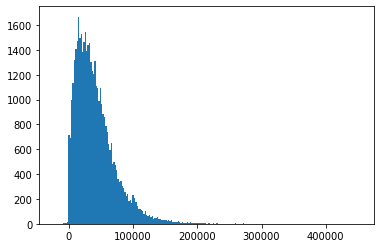

In [449]:
plt.hist(Kibergrad.dohodek, bins=223)

Histogram: na y osi je število družin, ki ima dohodek iz x osi

### B naloga

Dorišite normalno gostoto, katere pričakovana vrednost in standardni odklon
se ujemata s povprečjem in standardnim odklonom dohodka družine v Kibergradu. Kako dobro se prilega?

In [422]:
#pričakovana vrednost se ujema s povprečjem
povprecje = Kibergrad.dohodek.mean()
povprecje

41335.50704096979

In [423]:
#standardni odklon izracunamo s pomocjo funkcije .std()
standardni_odklon = Kibergrad.dohodek.std()
standardni_odklon

32037.61941788666

In [424]:
# gostota normalne porazdelitve

def normalna(x, pov, st):
    return 1/ (st*(2*math.pi)**0.5) * math.e**(-0.5*((x-pov)/st)**2)

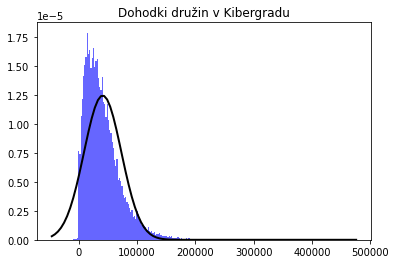

In [450]:
#koda vzeta iz strani https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/

# Plot the histogram.
plt.hist(Kibergrad.dohodek, bins=223, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = numpy.linspace(xmin, xmax, 100)
p = normalna(x, povprecje, standardni_odklon)

  
plt.plot(x, p, 'k', linewidth=2)
title = "Dohodki družin v Kibergradu".format(povprecje, standardni_odklon)
plt.title(title)
  
plt.show()

### C naloga

Narišite kumulativno porazdelitveno funkcijo porazdelitve dohodkov družin v
Kibergradu in primerjajte s kumulativno porazdelitveno funkcijo ustrezne normalne porazdelitve. Spet komentirajte, kako dobro se prilega.

Kumulativna porazdelitvena funkcija porazdelitve dohodkov družin v
Kibergradu

In [426]:
# kumulativna porazdelitvena funkcija
def cdf(x):
    stevec = 0
    for i in range(43886):
        if int(Kibergrad_urejen.dohodek.iloc[i]) <= x:
            stevec += 1
    return stevec/43886

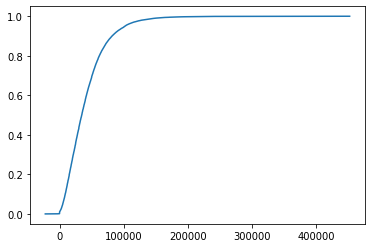

In [427]:
#koda iz strani https://www.statology.org/cdf-python/
#sort data
x = numpy.sort(Kibergrad.dohodek)

#calculate CDF values
y = 1. * numpy.arange(len(Kibergrad.dohodek)) / (len(Kibergrad.dohodek) - 1)

#plot CDF
plt.plot(x, y)

Kumulativna porazdelitvena funkcija ustrezne normalne porazdelitve

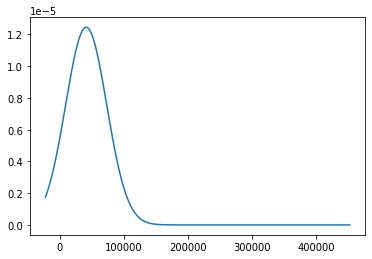

In [428]:
x = numpy.linspace(m, M, 10000)
y = []
for i in x:
    y.append(statistics.NormalDist(povprecje, standardni_odklon).pdf(i))

plt.plot(x, y)

Primerjava

***
**preveri ali se da narisat v isti graf!!!**

***

### D naloga

Narišite še primerjalni kvantilni (Q–Q) grafikon, ki porazdelitev dohodkov
družin v Kibergradu primerja z normalno porazdelitvijo

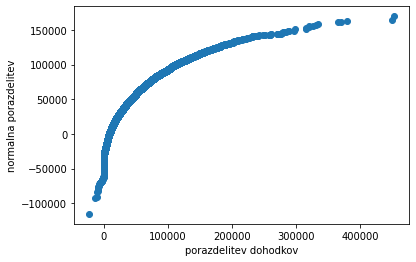

In [446]:
podatki_normalne = numpy.random.normal(povprecje,standardni_odklon,43886)
podatki_normalne.sort()

podatki_dohodkov = Kibergrad_urejen.dohodek

plt.scatter(podatki_dohodkov,podatki_normalne)
#plt.plot([min(podatki_dohodkov),max(podatki_dohodkov)],[min(podatki_dohodkov),max(podatki_dohodkov)],color="red")
plt.xlabel("porazdelitev dohodkov")
plt.ylabel("normalna porazdelitev")
plt.show()

### E naloga

Vzemite 1000 enostavnih slučajnih vzorcev velikosti 400 in narišite histogram
vzorčnih povprečij dohodkov družin

In [431]:
seznam_povprecij = []
for j in range(1000):
    seznam_dohodkov = []
    for i in range(0,400):
        n = random.randint(0,43885)
        d = Kibergrad.dohodek[n]
        seznam_dohodkov.append(d)
    seznam_povprecij.append(sum(seznam_dohodkov) / len(seznam_dohodkov))

(array([  4.,  33.,  98., 223., 265., 220., 108.,  42.,   5.,   2.]),
 array([36130.6225, 37275.0665, 38419.5105, 39563.9545, 40708.3985,
        41852.8425, 42997.2865, 44141.7305, 45286.1745, 46430.6185,
        47575.0625]),
 <BarContainer object of 10 artists>)

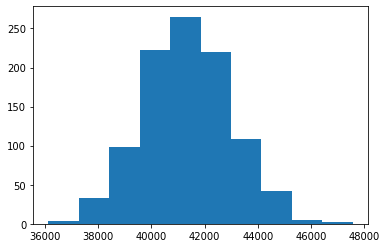

In [432]:
plt.hist(seznam_povprecij)

**Preveri ali je tako misljen histogram**

### F naloga

Dorišite normalno gostoto, katere pričakovana vrednost se ujema s povprečnim
dohodkom na družino v Kibergradu, standardni odklon pa s standardno napako
za enostavni slučajni vzorec velikosti 400. Komentirajte, kako dobro se prilega.

In [433]:
# pričakovana vrednost = povprečje dohodkov v celotni populaciji
pričakovana_vrednost = sum(Kibergrad.dohodek)/len(Kibergrad.dohodek)
pričakovana_vrednost

41335.50704096979

In [434]:
#standardni odklon = SE za enostavni slučajni vzorec velikostni 400

se = Kibergrad.dohodek.sem()
se

152.9316022480974

In [442]:
#drugi način za zračunat se
numpy.std(Kibergrad.dohodek, ddof=1) / numpy.sqrt(numpy.size(Kibergrad.dohodek))

152.9316022480974

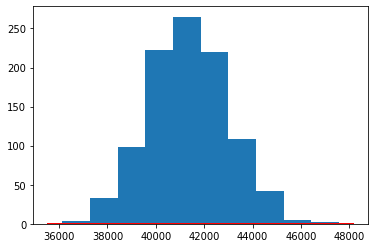

In [441]:
# Plot the histogram.
from turtle import color


plt.hist(seznam_povprecij)
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = numpy.linspace(xmin, xmax, 100)
p = normalna(x, pričakovana_vrednost, se)

  
plt.plot(x, p, 'k', linewidth=2, color='r')
  
plt.show()

### G naloga

Za vzorčna povprečja podobno kot prej narišite še kumulativno porazdelitveno
funkcijo in primerjalni kvantilni grafikon ter primerjajte z normalno porazdelitvijo. Komentirajte prileganje.

KUMULATIVNA PORAZDELITVENA FUNKCIJA

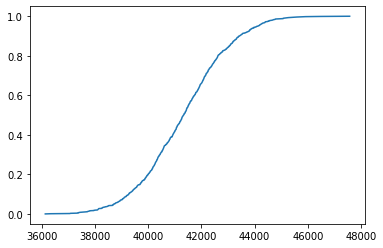

In [437]:
#KUMULATIVNA PORAZDELITVENA FUNKCIJA

#plot CDF
#sort data
x = numpy.sort(seznam_povprecij)

#calculate CDF values
y = 1. * numpy.arange(len(seznam_povprecij)) / (len(seznam_povprecij) - 1)

#plot CDF
plt.plot(x, y)

KVANTILNI GRAFIKON

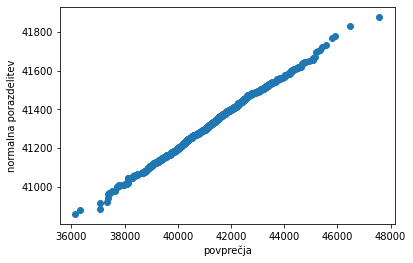

In [444]:
podatki_normalne = numpy.random.normal(pričakovana_vrednost,se,1000)
podatki_normalne.sort()

seznam_povprecij.sort()

plt.scatter(seznam_povprecij,podatki_normalne)

plt.xlabel("povprečja")
plt.ylabel("normalna porazdelitev")
plt.show()